<a href="https://colab.research.google.com/github/ChastityB/Heart_Failure_Predictions/blob/main/Heart_Failure_Predictions_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Failure Predictions

Chastity Benton
03/2022

##Task: Create a model to determine if a patient has heart disease or not.

##Data Dictionary

Column Name | Data Type | Description
------------|-----------|------------
Age | Float | Age of patient 
Sex | Object | Sex of patient (M: Male, F: Female)
ChestPainType | Object | chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
RestingBP |Float | resting blood pressure (mm Hg)
Choloesterol| Float | serum cholesterol (mm/dl)
FastingBS | Float | fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)
Resting ECG | Object | resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
MaxHR | Float | Maximum heart rate achieved
ExerciseAngina | Object | exercise-induced angina (Y: Yes, N: No)
Oldpeak | Float | ST (Numeric value measured in depression)
ST_Slope | Object | the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)
Heart Disease | Float | (1: heart disease, 0: Normal), target

##Load Necessary Libraries

In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Load the dataset

In [2]:
#load the dataset
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/02 Machine Learning/03 Week 3: Classification Models/Assignment Exercise/Project Part 2/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


##Inspect data/Clean up data

###Explore the data

In [3]:
#Explore the data (dtypes, number of rows, number of columns, and null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


The dataset matches the data dictionary. There are no null values. 

In [4]:
#Determining if there are any duplicates
df.duplicated().any()

False

There are no duplicates in the data. 

In [5]:
#Checking statistical analysis for any irregularities
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Resting BP and Cholesterol have a min of 0. This is unlikely, so I will check where in the data is Cholesterol == 0 

In [6]:
display(df.loc[df['Cholesterol'] == 0])
df.loc[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Based on the chart above, we can see that the patients are alive, therefore a cholesterol of 0 is impossible. This error in the data will be fixed with the median. 

Resting BP only has one value at 0. This can be dropped. 

In [7]:
#determine the median
df['Cholesterol'].median()

223.0

In [8]:
#replace the Cholesterol 0 values with the median
df['Cholesterol'] = df['Cholesterol'].replace(0, df['Cholesterol'].median())

#ensure the code worked by 
df.loc[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [9]:
#Dropping single Resting BP ==0 in the data
df = df.drop(index = 449)

#Ensure the data has been dropped
df.loc[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [10]:
#ensure column labels have no errors

#instantiate the datatypes
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
print(str_cols)

num_cols = data_types[data_types=='float64'].index
print(f'\n{num_cols}')

int_cols = data_types[data_types=='int64'].index
print(f'\n{int_cols}\n')

#explore each univariate distribution object in a loop
for col in str_cols:
  print(f'-{col}:')
  print(df[col].value_counts())
  print('\n\n')

#explore each univariate distribution float64 in a loop
for ncol in num_cols:
  print(f'--{ncol}:')
  print(df[ncol].value_counts())
  print('\n\n')

#explore each univariate distribution int64 in a loop
for intcol in int_cols:
  print(f'--{intcol}:')
  print(df[intcol].value_counts())
  print('\n\n')

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

Index(['Oldpeak'], dtype='object')

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'HeartDisease'],
      dtype='object')

-Sex:
M    724
F    193
Name: Sex, dtype: int64



-ChestPainType:
ASY    496
NAP    202
ATA    173
TA      46
Name: ChestPainType, dtype: int64



-RestingECG:
Normal    551
LVH       188
ST        178
Name: RestingECG, dtype: int64



-ExerciseAngina:
N    546
Y    371
Name: ExerciseAngina, dtype: int64



-ST_Slope:
Flat    459
Up      395
Down     63
Name: ST_Slope, dtype: int64



--Oldpeak:
 0.0    368
 1.0     86
 2.0     76
 1.5     52
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3


No inconsistensies were found. 

##Exploratory Visualization

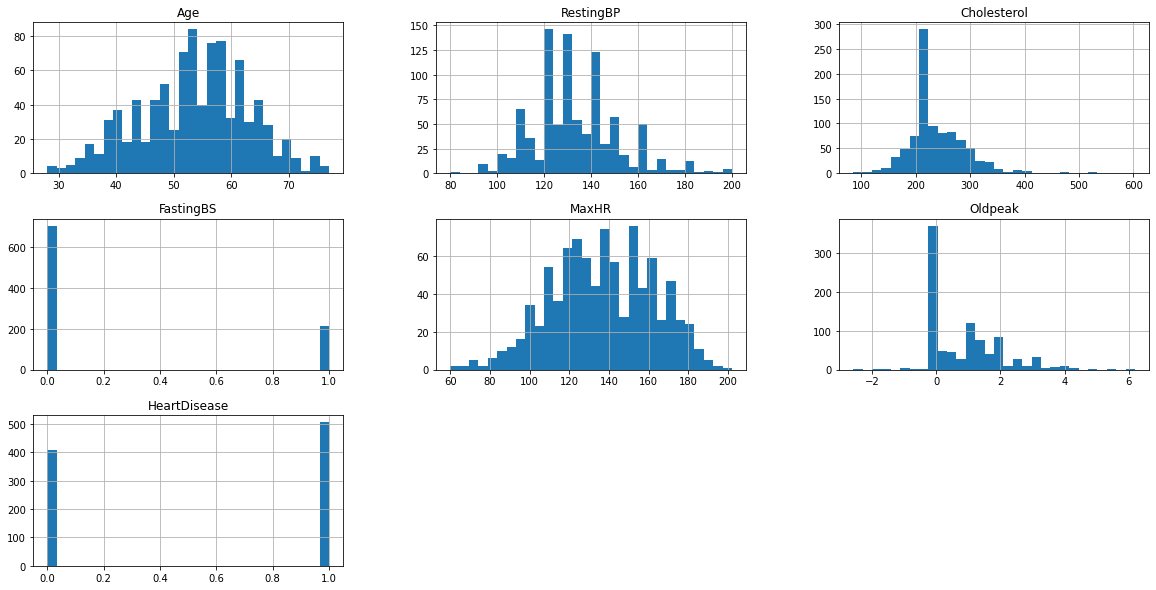

In [11]:
#histogram of numerical data
df.hist(bins=30, figsize=(20,10));

* Age, RestingBP, and MaxHR have an even distribution in the data. 

* Oldpeak has a lot of values at 0

* Cholesterol has a lot of values in the ~200s mark. 

###What type of chest pains are present in patients?

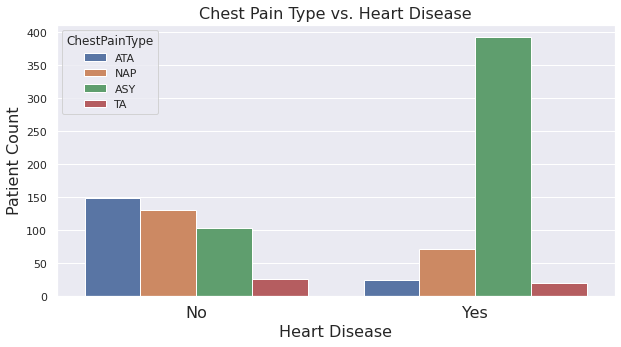

In [12]:
#Chest Pain Type vs Heart Disease
sns.set(rc = {'figure.figsize':(10,5)})
sns.countplot(x=df['HeartDisease'], hue=df['ChestPainType'])
plt.xticks(np.arange(2),['No', 'Yes'], fontsize=16)
plt.ylabel('Patient Count', fontsize=16)
plt.xlabel('Heart Disease', fontsize=16)
plt.title('Chest Pain Type vs. Heart Disease', fontsize=16);

We can see most patients with heart disease are asymptomatic. 

###At what age is heart disease more likely to appear?

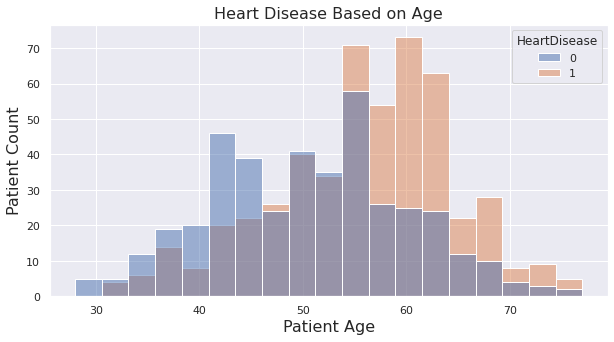

In [13]:
sns.histplot(data = df, x = 'Age', hue ='HeartDisease')
plt.title('Heart Disease Based on Age', fontsize=16)
plt.xlabel('Patient Age', fontsize=16)
plt.ylabel('Patient Count', fontsize=16);

Heart Disease seems is more likely during the ages of 55-65.

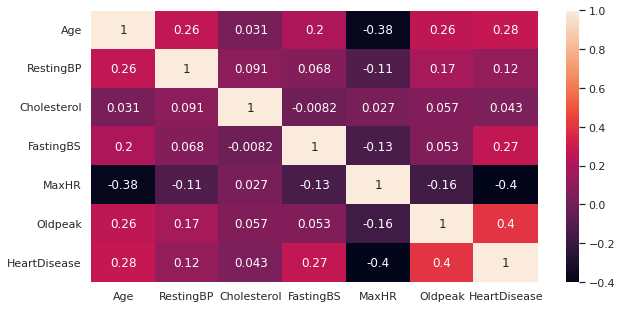

In [14]:
# Explore the relationships between variables with bivariate visuals
corr = df.corr()

sns.heatmap(corr, annot = True);

MaxHR, Old peak, and Age have slight correlation to Heart Disease


####Understand the best set of features to explain a relationship between two variables.

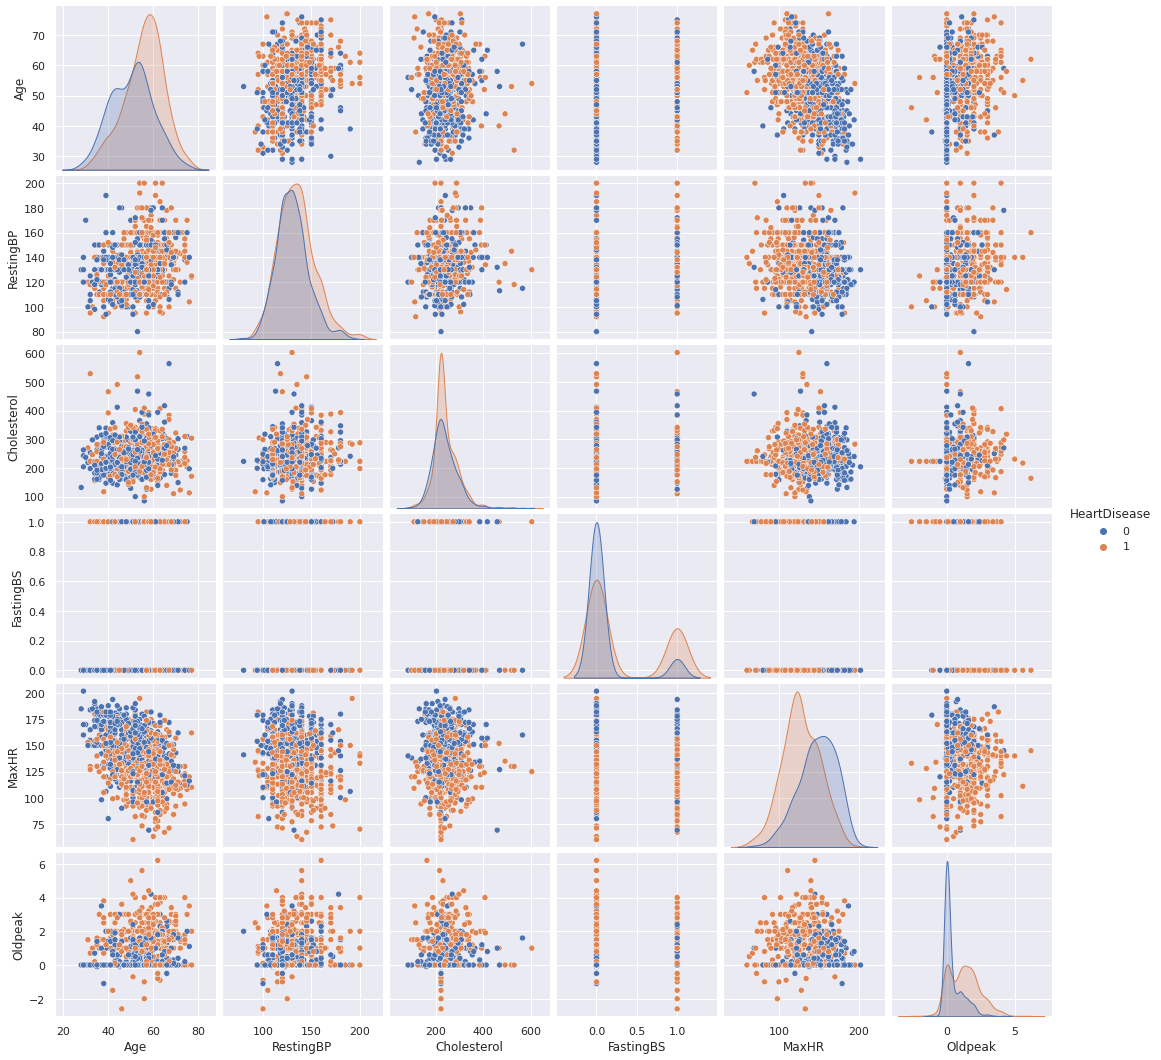

In [15]:
#Adaptated from https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot
sns.pairplot(df, hue="HeartDisease")